
**Gapminder_animation-FuncAnimation_PLOT_SEM-legend**


In [97]:
# libraries
#importar as bibliotecas analizar e visualizar dados 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import seaborn as sns
sns.set_style("white")
import pandas as pd
my_dpi=96

**Importar ficheiro em csv da internet, para posterioremente ler com a biblioteca pandas, e confirmar a sua correta importação através da função head que por default mostra as primeiras 5 linhas.**  

In [98]:
# Get the data (csv file is hosted on the web)
url = 'https://python-graph-gallery.com/wp-content/uploads/gapminderData.csv'
data = pd.read_csv(url)
#data=pd.read_csv('gapminderData.csv')
data.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


**Separar a info dentro da "continente" no caso em cinco valores diferentes**

In [99]:
# And I need to transform my categorical column (continent) in a numerical value group1->1, group2->2...
data['continent']=pd.Categorical(data['continent'])

**Contar anos únicos na coluna Year**

In [100]:
anos=data.year.unique()

**QUESTÃO A  - Descrição do Código**

Depois de chamar a biblioteca matplotlib, definimos a altura e largura de apresentação.
Posteriormente, no # Add title definimos, labels e escala de apresentação (no caso a logaritmica) para o eixo dos y, e por fim limitados os intervalos de valores a apresentar em cada um dos eixos.

Através da função def animate definimos o que será mostrado no gráfico;
para isso colocamos no titulo do gráfico o nome "Year" que será apresentado em conjunto com o valor do ano; 
seguidamente definimos tmp para a respectiva apresentação dos anos e o passar dos anos;  
definimos os eixo y  com'gdpPercap', e o eixo x com 'lifeExp', 
o parametro s define o tamanho de marcador que no caso será definido pala coluna ['pop']/20000, c = é reponsavel pela atribuição de cor que neste caso estará associado aos 5 continentes, os restantes parametros realacionam-se com as caracteristicas fisicas da bolhas.


Finalmente e através função animate definimos os frames da animação. Determinamos os frames a apresentar
 através de frames=len(anos), o intervalo e milisegundos e a ausência de repetições **

**QUESTÃO A METODO - Interpretação**

A contrução deste gráfico foi através do método plot scatter. Podemos ver como, ao longo dos anos, nos cinco continentes, a evolução da relação do GDP per Capita e o Life Expectancy que se vai fazendo mostrar no gráfico graças à função animate.

A função animate vai se servir da variavel "anos"  para encontrar todas as informações de "Life Expentacy" e "GDP per Capita" referentes a cada continente, e mostrar estas informações no decorrer dos anos, numa lógica de sobreposição de imagens. 

Desta forma conseguimos entender a relação existente entre as variáveis lifeExp (esperança média de vida) e gdpPercap (PIB per capita), os autores consideraram a esperança média de vida como a variável independente e o PIB per capita como variável dependente. 


**Questão B Temos “bolhas” de cinco (5) cores diferentes. O que representa cada cor? Justifique, com descrição detalhada do processo.**

As cinco cores representadas são os 5 continentes que foram agrupadas por categorias (na linha de código data["continent"]=pd.Categorical(data["continent"]) e  poderiamos confirmar que o número de continentes é cinco através deste código: numeroContinentes = data.continent.unique()). Foi através do parametro c (c=tmp['continent'].cat.codes) 
que se definiu a representação destas cores dos diferentes continentes para serem apresentadas no gráfico.

**Questão C LEGENDAS/JUSTIFICAÇÃO**
Para adicionar as legendas chamamos a função ax.legend, à qual adicionamos handles, associamos as labels ao data["continent"].unique(), foram fixadas no canto inferior direto e com o titulo de Continentes.
linha de código:ax.legend(handles =scut.legend_elements () [0], labels = data["continent"].unique(), loc="lower right", title= "CONTINENTES")

<IPython.core.display.Javascript object>


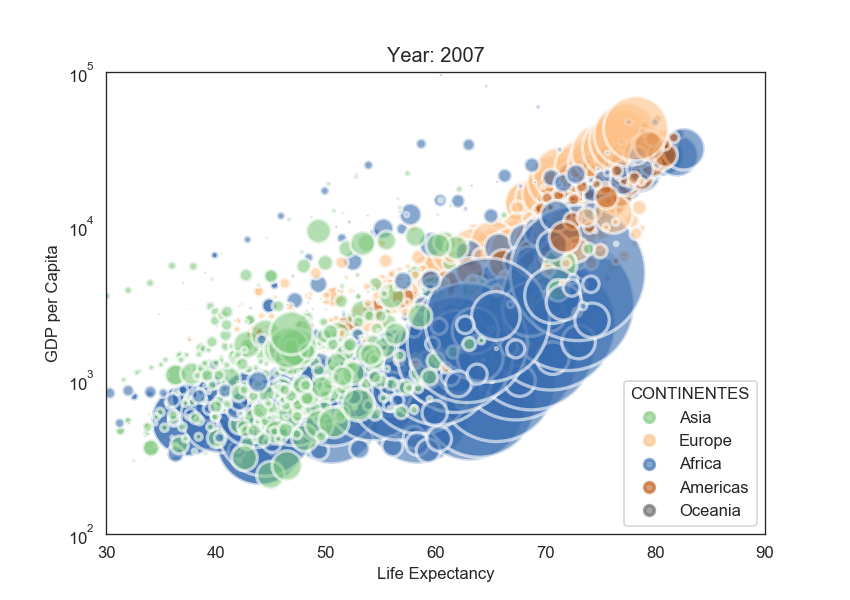

In [118]:
%matplotlib notebook
%matplotlib notebook

# initialize a figure
#fig=plt.figure(figsize=(680/my_dpi, 480/my_dpi), dpi=my_dpi)
fig, ax = plt.subplots(figsize=(680/my_dpi, 480/my_dpi), dpi=my_dpi)

# Add titles (main and on axis)
plt.yscale('log')
plt.xlabel("Life Expectancy")
plt.ylabel("GDP per Capita")
plt.ylim(100,100000)
plt.xlim(30, 90)

def animate(i):
    plt.title("Year: "+str(anos[i]) )
    tmp=data[ data.year == anos[i] ]
    scut=plt.scatter(tmp['lifeExp'], tmp['gdpPercap'] , s=tmp['pop']/200000 , c=tmp['continent'].cat.codes, cmap="Accent", alpha=0.6, edgecolors="white", linewidth=2)
    #scut=ax.scatter(tmp['lifeExp'], tmp['gdpPercap'] , s=tmp['pop']/200000 , c=tmp['continent'].cat.codes, cmap="Accent", alpha=0.6, edgecolors="white", linewidth=2)
    ax.legend(handles =scut.legend_elements () [0], labels = data["continent"].unique(), loc="lower right", title= "CONTINENTES")
    
ani = animation.FuncAnimation(fig, animate, frames=len(anos), interval=200, blit=False, repeat=False)
    
plt.show()

